a. Φορτώστε και προεπεξεργαστείτε τα δεδομένα. Χωρίστε
τα σε σύνολα εκπαίδευσης και ελέγχου.

In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
from keras.utils import to_categorical
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

b. Κατασκευάστε ένα CNN μοντέλο χρησιμοποιώντας την βιβλιοθήκη
TensorFlow. Χρησιμοποιήστε στρώσεις Conv2D, MaxPooling2D, Flatten και
Dense. Πειραματιστείτε με διάφορες αρχιτεκτονικές

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

c. Εκπαιδεύστε το μοντέλο σας στα δεδομένα εκπαίδευσης.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 16s 6ms/step - loss: 1.5128 - accuracy: 0.4480 - val_loss: 1.2915 - val_accuracy: 0.5352
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 1.1210 - accuracy: 0.6036 - val_loss: 1.0170 - val_accuracy: 0.6382
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 0.9617 - accuracy: 0.6639 - val_loss: 0.9858 - val_accuracy: 0.6496
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.8541 - accuracy: 0.7012 - val_loss: 0.9043 - val_accuracy: 0.6876
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.7763 - accuracy: 0.7285 - val_loss: 0.8355 - val_accuracy: 0.7088
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.7081 - accuracy: 0.7513 - val_loss: 0.8385 - val_accuracy: 0.7188
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.6518 - accuracy: 0.7697 - val_loss: 0.8128 - val_accuracy: 0.7242
Epoch

d. Αξιολογήστε την απόδοση του μοντέλου σας στο σύνολο ελέγχου

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8278 - accuracy: 0.7342
Test Loss: 0.8277711868286133
Test Accuracy: 0.7342000007629395


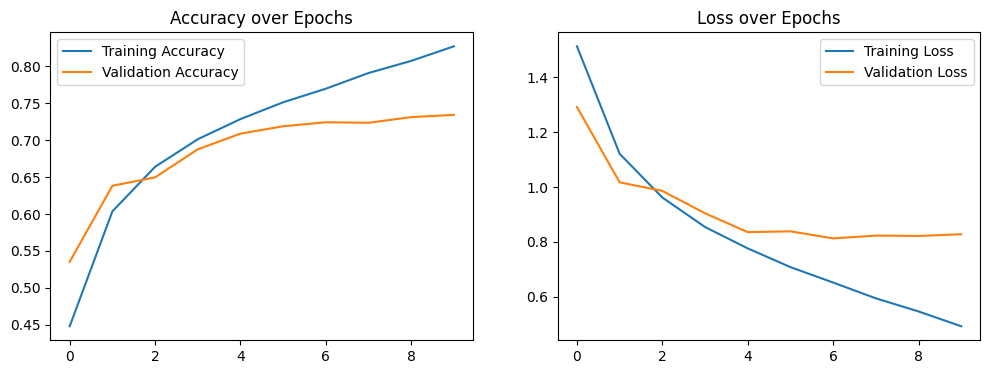

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

b. Κατασκευάστε ένα MLP (Πολύεπίπεδο Νευρωνικό Δίκτυο) μοντέλο
με τη βοήθεια της βιβλιοθήκης TensorFlow

In [ ]:
mlp = Sequential()

mlp.add(Flatten(input_shape=(32, 32, 3)))
mlp.add(Dense(128, activation='relu'))
mlp.add(Dense(64, activation='relu'))
mlp.add(Dense(10, activation='softmax'))

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

mlp.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_26 (Dense)            (None, 128)               393344    
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 10)                650       
                                                                 
Total params: 402250 (1.53 MB)
Trainable params: 402250 (1.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


c. Κατασκευάστε ένα CNN (Convolutional Neural Network) μοντέλο με
τη βοήθεια της βιβλιοθήκης TensorFlow

In [ ]:
cnn = Sequential()

cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_7 (Flatten)         (None, 2048)             

d. Εκπαιδεύστε και τα δύο μοντέλα στα δεδομένα εκπαίδευσης.

In [ ]:
history_mlp = mlp.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))
history_cnn = cnn.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
782/782 [==============================] - 6s 6ms/step - loss: 1.8864 - accuracy: 0.3227 - val_loss: 1.7373 - val_accuracy: 0.3721
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6998 - accuracy: 0.3937 - val_loss: 1.7088 - val_accuracy: 0.3915
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 1.6239 - accuracy: 0.4181 - val_loss: 1.6230 - val_accuracy: 0.4194
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 1.5785 - accuracy: 0.4367 - val_loss: 1.5520 - val_accuracy: 0.4471
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5422 - accuracy: 0.4473 - val_loss: 1.5815 - val_accuracy: 0.4368
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 1.5226 - accuracy: 0.4558 - val_loss: 1.4992 - val_accuracy: 0.4644
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 1.4966 - accuracy: 0.4688 - val_loss: 1.4979 - val_accuracy: 0.4665
Epoch 

e. Αξιολογήστε την απόδοση και των δύο μοντέλων στο σύνολο
ελέγχου.

In [ ]:
test_loss_mlp, test_accuracy_mlp = mlp.evaluate(X_test, y_test)

print(f"Test Loss for MLP: {test_loss_mlp}")
print(f"Test Accuracy for MLP: {test_accuracy_mlp}")

313/313 [==============================] - 1s 3ms/step - loss: 1.4677 - accuracy: 0.4782
Test Loss for MLP: 1.4676893949508667
Test Accuracy for MLP: 0.4781999886035919


In [ ]:
test_loss_cnn, test_accuracy_cnn = cnn.evaluate(X_test, y_test)

print(f"Test Loss for CNN: {test_loss_cnn}")
print(f"Test Accuracy for CNN: {test_accuracy_cnn}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8410 - accuracy: 0.7252
Test Loss for CNN: 0.8410046696662903
Test Accuracy for CNN: 0.7251999974250793


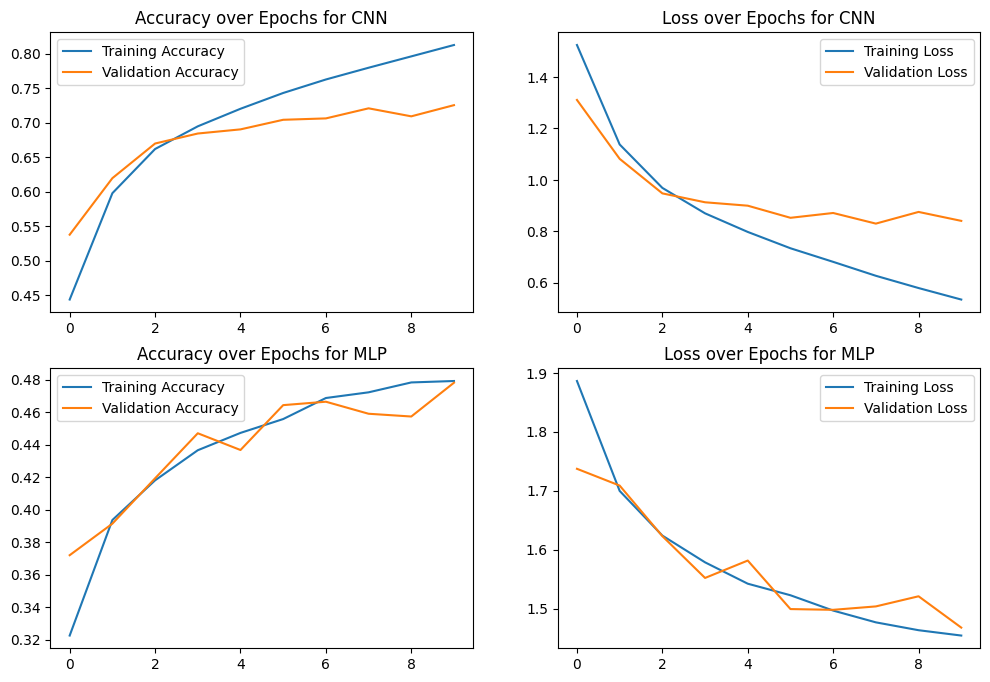

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs for CNN')

plt.subplot(2, 2, 2)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs for CNN')

plt.subplot(2, 2, 3)
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs for MLP')

plt.subplot(2, 2, 4)
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs for MLP')
plt.show()